# Assignment 2


Students: Clara Louise Brodt (s224189) & Celina Laungaard (s234809)

Course: Social Computational Science (02467)
GitHub link: https://github.com/claralb2002/Social-Computational-Science-Assignment-1.git 

(Link is correct, look in folder "Assignment 2")

| Contribution| Celina | Clara |
| --- | --- | --- |
| Part 1 | 50% | 50% |
| Part 2 | 50% |50% |
| Part 3 | 50% | 50% |
| Part 4 | 50% |50% |


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json

np.random.seed(333)


## Part 1: Properties of the real-world network of Computational Social Scientists

These exercises are taken from Week 5. Please note that 2 Degree distribution is taken out and 3 Shortest paths is numbered 2 here.
> __Exercise 1: Analyzing Networks through a Random Model__ 
>
>
>
> 1. _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.  
> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula). 
> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.   
> * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below). 
>
> * Answer the following questions __(max 200 words in total)__: 
>    - What regime does your random network fall into? Is it above or below the critical threshold?  
>    - According to the textbook, what does the network's structure resemble in this regime?  
>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.
>
>   


In [2]:
# Load network
with open("final_network.json") as f:
    data = json.load(f)

# Extract nodes and links manually
nodes = data["nodes"]
edges = data["links"]

# Count nodes and edges
N = len(nodes)
L = len(edges)

print(f"Number of nodes (N): {N}")
print(f"Number of actual edges (L_actual): {L}")



Number of nodes (N): 15101
Number of actual edges (L_actual): 59432


We calculate probability by using equation 3.2:
$$
\langle L \rangle = p \cdot \frac{N(N-1)}{2}
$$
Isolate for $p$
$$
p = \frac{2L}{N(N-1)}
$$

In [3]:
# Calculate probability 
p = (2 * L) / (N * (N - 1))

print(f"Calculated probability p = {p:.4f}")

Calculated probability p = 0.0005


Calculates average degree by using equation 3.3
$$
\langle k \rangle = p(N-1)
$$

In [4]:
# Calculate average degree 

k = p * (N - 1)

print(f"Average degree k = {k:.4f}")

Average degree k = 7.8713


In [5]:
# Function to generate random network using calculated p and N

G_random = nx.gnp_random_graph(N, p, seed = 333)

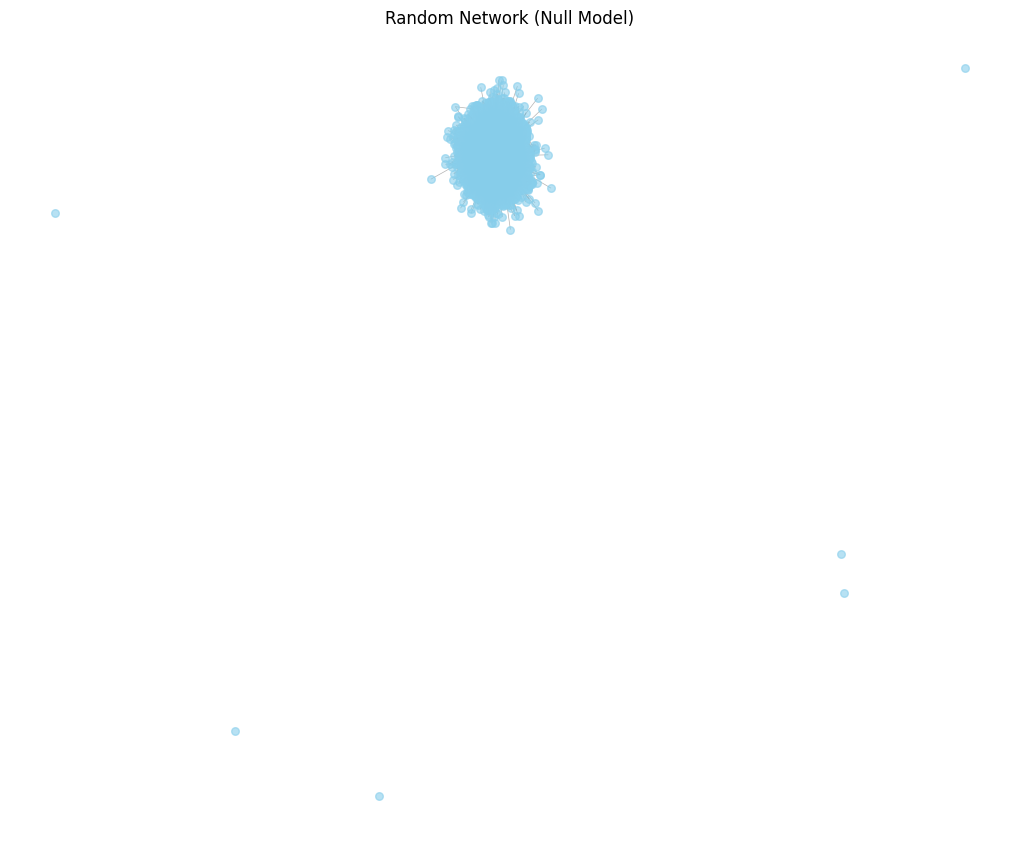

In [6]:
# Visualize the new network

def visualize_network(G):
    pos = nx.spring_layout(G, seed=333) 
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, node_size=30, node_color='skyblue', edge_color='gray', width=0.5, alpha=0.6, with_labels=False)
    plt.title("Random Network (Null Model)")
    plt.axis('off')
    plt.show()

visualize_network(G_random)

<span style="color:red">
Question: What regime does your random network fall into? Is it above or below the critical threshold? 
</span>

*Our k is larger than 1, and according to section 3.6 in the networksciencebook.com, that falls into the supercritical regime where $\langle k \rangle > 1$ and $p > 1/N$. Since the critical threshold is $\langle k \rangle = 1$, then it is above the critical threshold. When it is above the critical threshold, it means that the network probably contains a giant connected component, as a cluster that spans a significant part of the nodes, as seen in the visualization above.*

<span style="color:red">
Question: According to the textbook, what does the network's structure resemble in this regime?  
</span>

*As $\langle k \rangle$ expands beyond the critical point, the giant component grows, drawing in more nodes. However, we still se a lot of isolated components, forming a tree, while the giant component in the top contains loops and cycles. This is characterized by a nonlinear relationship relationship between the average defree and the size of the large compontent, specially when $\langle k \rangle$ becomes bigger.*


<span style="color:red">
Question: Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.
</span>

*The visualization of the random network above show a single giant component sourrounded by several small, disconnected clusters and isolatede nodes. This is exactly what theory predicts when talking about the supercritical regime. In contrast, actual networks would often show sommunity structure and clustering coefficients (friends are connected, and likely also friends of friends). This random generated network lacks these features, and shows a more structureless and random (funny enough) pattern.*


> 2. _Shortest Paths_: Here, we will check if the Computational Social Scientists Network exhibits characteristics of a small-world network by analyzing its shortest paths.
> * Begin by identifying the largest connected component within the Computational Social Scientists network. Recall that a connected component is a subset of nodes in which every pair of nodes is connected by a path. For a refresher on connected components, see section 2.9 of the Network Science book. Follow these steps:
>    - Utilize [``nx.algorithms.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to enumerate all connected components, which will be returned as a list of node subsets.
>    - Select the largest subset of nodes identified in the previous step. Then, create a subgraph of your original network that includes only these nodes, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This subset forms your largest connected component, sometimes referred to as the [giant component](https://en.wikipedia.org/wiki/Giant_component).
> * Calculate the average (unweighted) shortest path length within this giant component by employing [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html).
> * Perform the same calculation for the giant component of the random network you constructed in the above exercise 1.
> * Reflect on how the average shortest path lengths of the real and random networks compare and answer the following questions, supporting your answers with the theory from the book.
>   - Why do you think I asked you to consider the giant component only?
>   - Why do you think I asked you to consider unweighted edges?
>   - Does the Computational Social Scientists network exhibit the small-world phenomenon?




In [7]:
# Convert to a NetworkX graph
G_css = nx.node_link_graph(data)

In [8]:
# Get all connected components
components = nx.algorithms.connected_components(G_css)

# Sort by size and select the largest one
largest_cc = max(components, key=len)

# Create a subgraph of the giant component
G_css_giant = G_css.subgraph(largest_cc).copy()
print(f"Size of giant component: {G_css_giant.number_of_nodes()} nodes, {G_css_giant.number_of_edges()} edges")


Size of giant component: 14163 nodes, 58124 edges


In [9]:
# Calculate average (unweighted) shortest path

avg_path = nx.average_shortest_path_length(G_css_giant)
print(f"Average shortest path lenth : {avg_path:.4f}")

Average shortest path lenth : 5.2130


In [10]:
# The same as above for the random network

# Convert to a NetworkX graph
G_random_network = G_random

# Get all connected components
components_random_network = nx.algorithms.connected_components(G_random_network)

# Sort by size and select the largest one
largest_cc_random_network = max(components_random_network, key=len)

# Create a subgraph of the giant component
G_random_network_giant = G_random.subgraph(largest_cc_random_network)

# Calculate average (unweighted) shortest path

avg_path_random_network = nx.average_shortest_path_length(G_random_network_giant)
print(f"Average shortest path lenth : {avg_path_random_network:.4f}")

Average shortest path lenth : 4.9044


<span style="color:red">
Question: Why do you think I asked you to consider the giant component only?
</span>

*Because the giant component only consists off connected nodes, and shortest paths only defines conneccted nodes. So when nodes are disconnected then the average path length ends up being undefined or maybe infinity. So when looking only at the giant component, we make sure that every node are connected to another node.*


<span style="color:red">
Question: Why do you think I asked you to consider unweighted edges?
</span>

*An unweigted graph is when all edges are equal and there therefore is no specifik cost when moving from node to node. This would have an huge impact on the analysis, when we are interested in how close the nodes are from each other, rather than the cost. Therefore we use unweighted edges.*


<span style="color:red">
Question: Does the Computational Social Scientists network exhibit the small-world phenomenon?
</span>

*In 

## Part 2 Network Analysis in Computational Social Science

These exercises are taken from Week 6: __Exercise 1: Mixing Patterns and Assortativity__ and __Exercise 3: Zachary's karate club__.

> __Exercise 1: Mixing Patterns and Assortativity__ 
>
> __Part 1: Assortativity Coefficient__ 
> 1. *Calculate the Assortativity Coefficient* for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in [this paper](https://arxiv.org/pdf/cond-mat/0209450.pdf) (equation 2, here for directed networks). **Do not use the NetworkX implementation.**
>


In [11]:
import json
import networkx as nx
import numpy as np

In [12]:
# Load the JSON file
with open("final_network.json", "r") as f:
    graph_data = json.load(f)

# Convert JSON back to NetworkX graph
G_loaded = nx.json_graph.node_link_graph(graph_data, directed=True)

In [13]:
# Ensure all nodes have a valid "country" attribute
for node in G_loaded.nodes:
    G_loaded.nodes[node]["country"] = G_loaded.nodes[node].get("country", "Unknown")

# Convert country names to numerical labels
list_of_countries = list(set(nx.get_node_attributes(G_loaded, "country").values()))
country_mapping = {country: i for i, country in enumerate(list_of_countries)}

# Apply the mapping directly to the graph
new_country_attributes = {}

for node in G_loaded.nodes:
    country_name = G_loaded.nodes[node]["country"]
    numeric_label = country_mapping[country_name]
    new_country_attributes[node] = {"country": numeric_label}

nx.set_node_attributes(G_loaded, new_country_attributes)

In [14]:
def assortativity_coefficient(G, attribute):
    """
    Compute the assortativity coefficient for a directed network based on a categorical node attribute.
    """
    edges = [(src, dst) for src, dst in G.edges if attribute in G.nodes[src] and attribute in G.nodes[dst]]

    # Extract numerical attribute values for each edge
    j_i = np.array([G.nodes[src][attribute] for src, dst in edges], dtype=np.float64)
    k_i = np.array([G.nodes[dst][attribute] for src, dst in edges], dtype=np.float64)

    M = len(j_i)  # Number of edges

    # Compute assortativity formula with improved numerical stability
    sum_jk = np.sum(j_i * k_i) / M
    sum_j = np.sum(j_i) / M
    sum_k = np.sum(k_i) / M
    sum_j2 = np.sum(j_i ** 2) / M
    sum_k2 = np.sum(k_i ** 2) / M

    numerator = sum_jk - sum_j * sum_k
    denominator = np.sqrt((sum_j2 - sum_j ** 2) * (sum_k2 - sum_k ** 2))

    return numerator / denominator if denominator != 0 else 0

# Compute assortativity coefficient
r = assortativity_coefficient(G_loaded, "country")
print("Manual Assortativity:", r)


Manual Assortativity: 0.32987293878301893


> __Part 2: Configuration model__
> In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model.  
>
> 2. *Implement the configuration model* using the _double edge swap_ algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:
>   - **a.** Create an exact copy of your original network.
>   - **b.** Select two edges, $e_{1} = (u,v)$ and $e_{2} = (x,y)$, ensuring *u != y* and *v != x*.
>   - **c.** Flip the direction of $e_{1}$ to $e_{1} = (v,u)$ 50% of the time. This ensure that your final results is not biased, in case your edges were sorted (they usually are). 
>   - **d.** Ensure that new edges $e_{1}' = (e_{1}[0],e_{2}[1])$ and $e_{2}' = (e_{2}[0],e_{1}[1])$ do not already exist in the network.
>   - **e.** Remove edges $e_{1}$ and $e_{2}$ and add edges $e_{1}'$ and $e_{2}'$.
>   - **f.** Repeat steps **b** to **e** until you have performed _E*10_ swaps, where E is the total number of edges.


In [15]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [16]:
# Load the original network
with open("final_network.json", "r") as f:
    graph_data = json.load(f)

# Convert JSON back to a NetworkX graph
G_loaded = nx.node_link_graph(graph_data, directed=False)

In [17]:
def double_edge_swap(G, num_swaps_multiplier=10):

   # Create a deep copy of the graph
    G_copy = G.copy()

    edges = set(G_copy.edges())  # Ensure edges are undirected
    E = len(edges)  # Number of edges
    num_swaps = E * num_swaps_multiplier  # Total swaps to perform

    for _ in tqdm(range(num_swaps)):
        # Select two random edges (convert set to list first)
        edge_list = list(edges)  # Convert set to list for sampling
        e1, e2 = random.sample(edge_list, 2)
        u, v = e1
        x, y = e2

        # Randomly flip e1 direction to avoid sorting bias
        if random.random() < 0.5:
            u, v = v, u
        if random.random() < 0.5:
            x, y = y, x

        # Ensure valid swapping conditions
        if u != y and v != x and (u, y) not in G_copy.edges() and (x, v) not in G_copy.edges():
            if (x,y) in G_copy.edges() and (u,v) in G_copy.edges(): 
                # Remove old edges safely 
                G_copy.remove_edge(u, v)
                G_copy.remove_edge(x, y)

                # Add new edges
                G_copy.add_edge(u, y)
                G_copy.add_edge(x, v)

    return G_copy

In [18]:
G_randomized = double_edge_swap(G_loaded)

100%|██████████| 594320/594320 [06:40<00:00, 1485.06it/s]



> 3. *Double check that your algorithm works well*, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.
>
>


In [19]:
# Verify that the degree distributions are identical
original_degrees = dict(G_loaded.degree())
randomized_degrees = dict(G_randomized.degree())
print(len(original_degrees),len(randomized_degrees))


# Compare degree distributions
degree_match = all(original_degrees[node] == randomized_degrees[node] for node in G_loaded.nodes())

print("Degree distribution preserved:", degree_match)

15101 15101
Degree distribution preserved: True


> __Part 3: Analyzing Assortativity in Random Networks__  
>
> 4. *Generate and analyze at least 100 random networks* using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.
>


In [20]:
import random
import itertools

def double_edge_swap_2(G, num_swaps_multiplier=10):

   # Create a deep copy of the graph
    G_copy = G.copy()
    G_copy = G_copy.to_undirected()

    E = len(G_copy.edges())
    nodes = list(itertools.chain(*list(G_copy.edges())))
    num_swaps = E * num_swaps_multiplier  # Total swaps to perform

    for _ in range(num_swaps): 
        x,u = random.sample(nodes,2)
        v = random.choice(list(G[u]))
        y = random.choice(list(G[x]))

        if u != y and x != v and (u, y) not in G_copy.edges() and (x, v) not in G_copy.edges():
            if (x,y) in G_copy.edges() and (u,v) in G_copy.edges(): 
            # Remove old edges safely 
                G_copy.remove_edge(u, v)
                G_copy.remove_edge(x, y)

                # Add new edges
                G_copy.add_edge(u, y)
                G_copy.add_edge(x, v)

    return G_copy

In [21]:
G_randomized = double_edge_swap_2(G_loaded)

In [22]:
# Verify that the degree distributions are identical
original_degrees = dict(G_loaded.degree())
randomized_degrees = dict(G_randomized.degree())
print(len(original_degrees),len(randomized_degrees))


# Compare degree distributions
degree_match = all(original_degrees[node] == randomized_degrees[node] for node in G_loaded.nodes())

print("Degree distribution preserved:", degree_match)

15101 15101
Degree distribution preserved: True


In [23]:
def A_coefficient(G):
    # Select the attribute to compute assortativity
    attribute = "country"  # Change this to the attribute you want

    # Create a mapping from unique attribute values to numeric labels
    unique_values = set(data.get(attribute, "Unknown") for _, data in G.nodes(data=True))
    attribute_mapping = {val: i for i, val in enumerate(unique_values)}

    # Assign numeric labels to each node
    for node in G.nodes:
        if attribute in G.nodes[node]:
            G.nodes[node][attribute] = attribute_mapping[G.nodes[node][attribute]]
        else:
            G.nodes[node][attribute] = -1  # Default for missing values

    # Now try computing assortativity
    nx_r = nx.numeric_assortativity_coefficient(G, "country")

    return nx_r


In [24]:
from tqdm import tqdm

list_of_AC = []

for _ in tqdm(range(100)): 
    G_randomized = double_edge_swap_2(G_loaded)
    nx_value = A_coefficient(G_randomized)
    list_of_AC.append(nx_value)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [05:00<00:00,  3.01s/it]


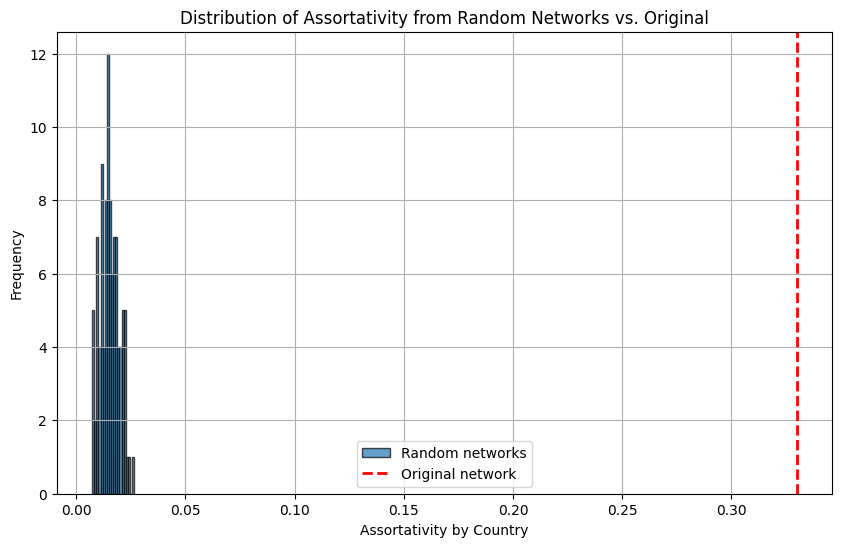

In [25]:
original_ac = r

plt.figure(figsize=(10, 6))
plt.hist(list_of_AC, bins=20, edgecolor='black', alpha=0.7, label='Random networks')
plt.axvline(original_ac, color='red', linestyle='--', linewidth=2, label='Original network')
plt.xlabel("Assortativity by Country")
plt.ylabel("Frequency")
plt.title("Distribution of Assortativity from Random Networks vs. Original")
plt.legend()
plt.grid(True)
plt.show()

> __Exercise 2: Zachary's karate club__: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function [karate_club_graph](https://networkx.org/documentation/stable//auto_examples/graph/plot_karate_club.html)

> 1. Visualize the graph. Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below.


In [26]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()

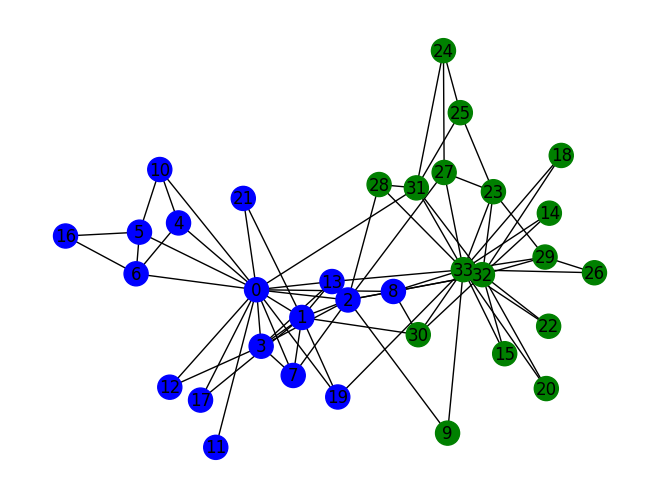

In [27]:
color = nx.get_node_attributes(G, "club")
color

color_map = []
for node in range(len(G)):
    if color[node] == 'Mr. Hi':
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()



> 2. Write a function to compute the __modularity__ of a graph partitioning (use **equation 9.12** in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.


In [28]:
from collections import defaultdict

def modularity(G, partition): 
    '''
    n_c = partitioning
    G = graph
    
    '''
    L = G.size(weight='weight')  # total weight of all edges

    # Organize nodes by community
    community_dict = defaultdict(set)
    for node, comm in nx.get_node_attributes(G, "club").items():
        community_dict[comm].add(node)

    modularity = 0.0

    for community_nodes in community_dict.values():
            subgraph = G.subgraph(community_nodes)

            L_c = subgraph.size(weight='weight')  # Total internal edge weight in community
            k_c = sum(G.degree(n, weight='weight') for n in community_nodes)  # Sum of degrees of nodes in community

            modularity += (L_c / L) - ((k_c / (2 * L)) ** 2)

    return modularity



> 3. Explain in your own words the concept of _modularity_.


ANSWER: Modularity is a way to measure how many communities appears in a network, which could also be called modules hence the name modularity. A community is defined by being a set of nodes which are more highly connected than towards other nodes in the same network, which makes them appear as a group in a visualization of the network. We can seperate networks into different communities ourself by partioning them based on common attributes, and with modularity we can then measure whether or not this split actually creates communties and a good community structure. A high modularity score indicates a better community structure, whereas a low indicates that this is not a way to split the network into modules. 


> 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a [node attribute](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_node_attributes.html), called _"club"_.


In [29]:
modularity_original_value = modularity(G,"club")
modularity_original_value

0.39143756676224206


> 5. Create $1000$ randomized version of the Karate Club network using the _double edge swap_ algorithm you wrote in the exercise above 5. For each of them, compute the modularity of the "club" split and store it in a list.


In [30]:
import random
import itertools

def double_edge_swap_2(G, num_swaps_multiplier=10):

   # Create a deep copy of the graph
    G_copy = G.copy()
    G_copy = G_copy.to_undirected()

    E = len(G_copy.edges())
    nodes = list(itertools.chain(*list(G_copy.edges())))
    num_swaps = E * num_swaps_multiplier  # Total swaps to perform

    for _ in range(num_swaps): 
        x,u = random.sample(nodes,2)
        v = random.choice(list(G[u]))
        y = random.choice(list(G[x]))

        if u != y and x != v and (u, y) not in G_copy.edges() and (x, v) not in G_copy.edges():
            if (x,y) in G_copy.edges() and (u,v) in G_copy.edges(): 
            # Remove old edges safely 
                G_copy.remove_edge(u, v)
                G_copy.remove_edge(x, y)

                # Add new edges
                G_copy.add_edge(u, y)
                G_copy.add_edge(x, v)

    return G_copy

In [31]:
from tqdm import tqdm

modularity_values = []

for _ in tqdm(range(100)): 
    G_randomized = double_edge_swap_2(G)
    modularity_value = modularity(G_randomized, "club")
    modularity_values.append(modularity_value)

  2%|▏         | 2/100 [00:00<00:05, 18.23it/s]

100%|██████████| 100/100 [00:00<00:00, 284.40it/s]



> 6. Compute the average and standard deviation of the modularity for the random network.


In [32]:
import statistics

mean = statistics.mean(modularity_values)
std = statistics.stdev(modularity_values)

mean,std

(0.03267655217374657, 0.06109531882564832)


> 7. Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)).


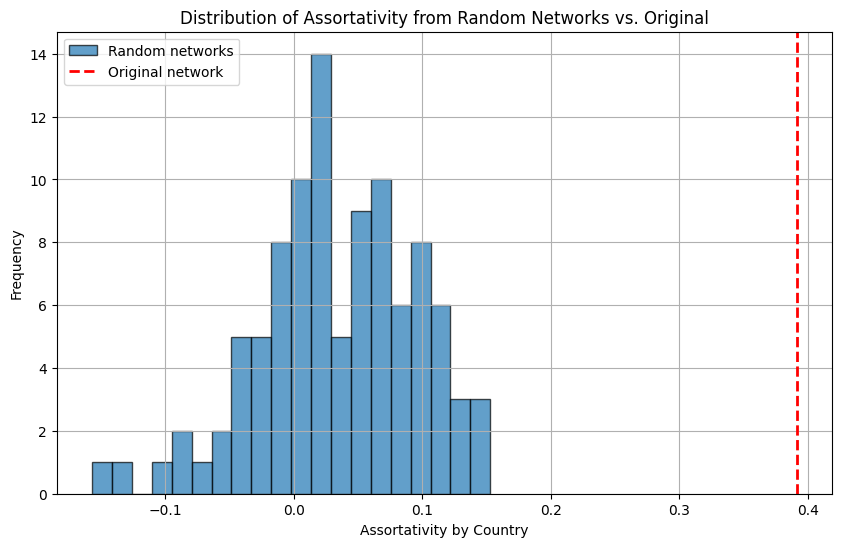

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(modularity_values, bins=20, edgecolor='black', alpha=0.7, label='Random networks')
plt.axvline(modularity_original_value, color='red', linestyle='--', linewidth=2, label='Original network')
plt.xlabel("Assortativity by Country")
plt.ylabel("Frequency")
plt.title("Distribution of Assortativity from Random Networks vs. Original")
plt.legend()
plt.grid(True)
plt.show()


> 8. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?


ANSWER: The club split is a good way of seperating the network into communities as it has a high modularity score. Especially when we compare with the random networks. Random networks are not supposed to show any modularity as the connection pattern between nodes is expected to be uniform, independent of the networks degree distribution. This means that if the network has a modularity score this is random and happens by chance. If we the compare our calculated score against 100 random networks and ours is significantly higher this indicates that our split and modularity score is not random but an indication of a community structure in the network. In these types of social networks some nodes are more connected then others and by preserving the degree of the nodes we retain the link to reality. By only randomizing who the nodes are linked to and not how many they are linked to, we examine the structure of the networ and whether communities are present. 


> 9.  Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?


In [48]:
import community.community_louvain as community_louvain


In [49]:
import networkx as nx
# import community as community_louvain  # from python-louvain package
from collections import defaultdict

# Run Louvain algorithm
partition_louvain = community_louvain.best_partition(G)

community_groups = defaultdict(set)
for node, comm_id in partition_louvain.items():
    community_groups[comm_id].add(node)

partition_sets = list(community_groups.values())

# Compute modularity
mod_louvain = modularity(G, partition_sets)

print("Louvain Modularity:", mod_louvain)

Louvain Modularity: 0.39143756676224206


ANSWER: The python louvain-algorithm found the exact same value of modularity as with the club split. The algorithm did not have any knowlegde of the real split in the data and only observed the connections it found in the graph, which indicates that the true split of clubs observed in the data aligns with the community structure present in the nodes in the graph. 


> 10.  Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix **_D_** with dimension (2 times _A_), where _A_ is the number of communities found by Louvain. We set entry _D_(_i_,_j_) to be the number of nodes that community _i_ has in common with group split _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

In [53]:
import community.community_louvain as community_louvain


In [54]:
import networkx as nx
#import community as community_louvain  # pip install python-louvain
import numpy as np

# Run Louvain community detection
partition = community_louvain.best_partition(G)

# Map of node to Louvain community
louvain_labels = list(partition.values())
communities = set(louvain_labels)
A = len(communities)

# Create confusion matrix D
D = np.zeros((A, 2), dtype=int)

for node in G.nodes():
    louvain_comm = partition[node]
    club_group = 0 if G.nodes[node]['club'] == 'Mr. Hi' else 1
    D[louvain_comm, club_group] += 1

print("Confusion matrix D:")
print(D)

Confusion matrix D:
[[11  0]
 [ 1 13]
 [ 5  0]
 [ 0  4]]


Row 0: Louvain community 0 has 11 nodes, all from club 0 (Mr. Hi).

Row 1: Louvain community 1
 has 14 nodes — 1 from club 0, 13 from club 1 (mostly Officer).

Row 2: Louvain community 2 has 5 nodes, all from club 0 (Mr. Hi).

Row 3: Louvain community 3 has 4 nodes, all from club 1 (Officer).

ANSWER: The algorithm determines there to be 4 communities in the data whereas we know there are only two clubs, however we can see that these extra two communties are almost only found within each of the clubs. This means that each club-communitie further contains two sub-communities, but as these sub-communtities are not across the two different clubs, the club split partitioning is still applicable. 

## Part 3 - Words that characterize Computational Social Science communities

These exercises are taken from Week 8
> __Exercise 1: TF-IDF and the Computational Social Science communities.__ The goal for this exercise is to find the words charachterizing each of the communities of Computational Social Scientists.
> What you need for this exercise: 
>    * The assignment of each author to their network community, and the degree of each author (Week 6, Exercise 4). This can be stored in a dataframe or in two dictionaries, as you prefer.  
>    * the tokenized _abstract_ dataframe (Week 7, Exercise 2)
>
> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?


*The point of TF-IDF is to evaluate how important a wors is within a document relative to a corpus of documents. It is constructed as a numerical statistic used in text mining and information retrieval. This helps in sorting in worsd based on relevance rather than just frequency.*

*TF stands for Term Frequency and measures as how often a term appears in a document. IDF stands for Inverse Document Frequence and measures how important a term is by considering its frequency across multiple documents.*


> 2. Now, we want to find out which words are important for each *community*, so we're going to create several ***large documents, one for each community***. Each document includes all the tokens of abstracts written by members of a given community. 
>   * Consider a community _c_
>   * Find all the abstracts of papers written by a member of community _c_.
>   * Create a long array that stores all the abstract tokens 
>   * Repeat for all the communities. 
> __Note:__ Here, to ensure your code is efficient, you shall exploit ``pandas`` builtin functions, such as [``groupby.apply``](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) or [``explode``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).



> 3. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the __top 5 communities__ (by number of authors). 
>   * Describe similarities and differences between the communities.
>   * Why aren't the TFs not necessarily a good description of the communities?
>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?



> 4. We're ready to calculate TF-IDF. Do that for the __top 9 communities__ (by number of authors). Then for each community: 
>   * List the 10 top TF words 
>   * List the 10 top TF-IDF words
>   * List the top 3 authors (by degree)
>   * Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?




 __Exercise 2: The Wordcloud__. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.
> * Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration). 
> * Comment on your results. What can you conclude on the different sub-communities in Computational Social Science? 
> * Look up online the top author in each community. In light of your search, do your results make sense?

 __Exercise 3: Computational Social Science__ 

> * Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science. 
> * In light of your data-driven analysis, has your understanding of the field changed? How? __(max 150 words)__